In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../dataset/combined_valeurs.csv')

In [8]:
df[161:161*2]

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,132,133,134,135,136,137,138,139,experiment_number,position
161,26/01/2005 17:49:45,300.641,0,1542,1,14,1,1,160.0,4.116579,...,0.004062,0.004042,0.004022,0.004081,0.004012,0.004052,0.004052,NaN,2,Left
162,26/01/2005 17:54:45,600.656,0,2777,1,14,1,1,160.0,4.116579,...,0.004052,0.004022,0.004042,0.004062,0.004002,0.004072,0.004062,NaN,2,Left
163,26/01/2005 17:59:46,901.156,0,4014,1,14,1,1,160.0,4.116579,...,0.004072,0.004062,0.004032,0.004081,0.004042,0.004052,0.004081,NaN,2,Left
164,26/01/2005 18:04:46,1201.391,0,5249,1,14,1,1,160.0,4.116579,...,0.004062,0.004062,0.004012,0.004072,0.004062,0.004032,0.004081,NaN,2,Left
165,26/01/2005 18:09:46,1502.000,0,6489,1,14,1,1,160.0,4.116579,...,0.004072,0.004012,0.004101,0.004032,0.004062,0.004091,0.004032,NaN,2,Left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,27/01/2005 06:51:04,47179.187,0,194525,1,14,1,1,160.0,4.116579,...,0.004249,0.004269,0.004269,0.004259,0.004279,0.004269,0.004249,NaN,2,Left
318,27/01/2005 06:56:04,47479.891,0,195763,1,14,1,1,160.0,4.116579,...,0.004259,0.004220,0.004259,0.004299,0.004220,0.004289,0.004309,NaN,2,Left
319,27/01/2005 07:01:05,47780.484,0,197001,1,14,1,1,160.0,4.116579,...,0.004269,0.004328,0.004240,0.004259,0.004299,0.004230,0.004279,NaN,2,Left
320,27/01/2005 07:06:05,48080.625,0,198236,1,14,1,1,160.0,4.116579,...,0.004240,0.004259,0.004299,0.004240,0.004279,0.004289,0.004240,NaN,2,Left


: 

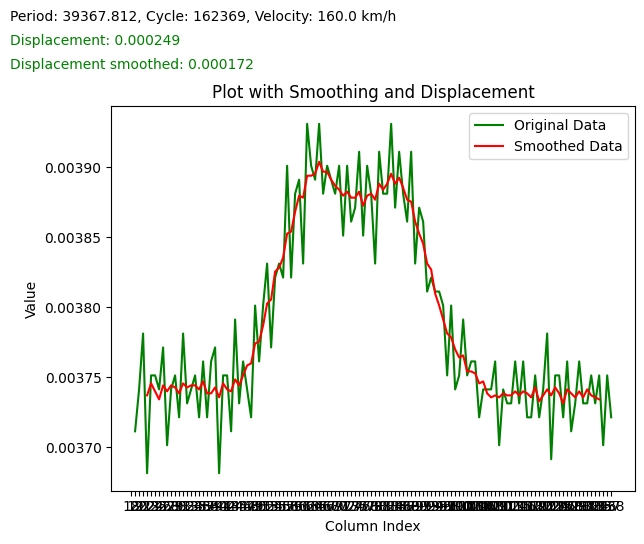

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_with_smoothing(df, row_number, window_size):
    # Convert data from column 18 onwards to numeric
    data_to_plot = pd.to_numeric(df.iloc[row_number, 18:139], errors='coerce')

    # Apply rolling mean for smoothing
    smoothed_data = data_to_plot.rolling(window=window_size, center=True).mean()

    # Plot original and smoothed data
    plt.plot(data_to_plot, label='Original Data', color='green')
    plt.plot(smoothed_data, label='Smoothed Data', color='red')

    # Get period, cycle number, and velocity for the specific row
    period = df.iloc[row_number, 1]
    cycle_number = df.iloc[row_number, 3]
    velocity = df.iloc[row_number, 8]

    # Calculate displacement (max value - first value)
    max_value = data_to_plot.max() if np.isfinite(data_to_plot.max()) else 0
    first_value = data_to_plot.iloc[0] if np.isfinite(data_to_plot.iloc[0]) else 0
    min_value = data_to_plot.min() if np.isfinite(data_to_plot.min()) else 0

    max_value_smoothed = smoothed_data.max() if np.isfinite(smoothed_data.max()) else 0
    min_value_smoothed = smoothed_data.min() if np.isfinite(smoothed_data.min()) else 0

    displacement_smoothed = max_value_smoothed - min_value_smoothed

    displacement = max_value - min_value

    # Add text outside the graph using figtext
    plt.figtext(0, 1.10, f"Period: {period}, Cycle: {cycle_number}, Velocity: {velocity} km/h")
    plt.figtext(0, 1.05, f"Displacement: {displacement:.6f}", fontsize=10, ha="left", color="green")
    plt.figtext(0, 1.0, f"Displacement smoothed: {displacement_smoothed:.6f}", fontsize=10, ha="left", color="green")


    plt.xlabel('Column Index')
    plt.ylabel('Value')
    plt.title('Plot with Smoothing and Displacement')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_with_smoothing(df, 130, 7)


In [5]:
import pandas as pd
import numpy as np

def calculate_displacement(df, window_size):
    displacement_values = []

    for row_number in range(len(df)):
        data_to_plot = pd.to_numeric(df.iloc[row_number, 18:139], errors='coerce')
        smoothed_data = data_to_plot.rolling(window=window_size, center=True).mean()

        max_value = data_to_plot.max() if np.isfinite(data_to_plot.max()) else 0
        first_value = data_to_plot.iloc[0] if np.isfinite(data_to_plot.iloc[0]) else 0
        min_value = data_to_plot.min() if np.isfinite(data_to_plot.min()) else 0
        # Calculate displacement

        max_value_smoothed = smoothed_data.max() if np.isfinite(smoothed_data.max()) else 0
        min_value_smoothed = smoothed_data.min() if np.isfinite(smoothed_data.min()) else 0

        displacement_smoothed = max_value_smoothed - min_value_smoothed

        displacement = max_value - min_value
        displacement_values.append(displacement_smoothed)

    # Add the displacement column to the dataframe
    df['displacement'] = displacement_values

    return df

df_with_displacement = calculate_displacement(df, window_size=4)

In [6]:
import os
import pandas as pd

def create_and_save_velocity_dataframes(df, output_dir):
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Group the DataFrame by the 'velocity' column
    grouped_by_velocity = df.groupby('velocity')

    # Loop through each unique velocity and save the corresponding DataFrame
    for velocity, velocity_df in grouped_by_velocity:
        # Define the output file name based on the velocity
        output_file_path = os.path.join(output_dir, f"data_velocity_{int(velocity)}.csv")
        
        # Save the DataFrame for the current velocity
        velocity_df.to_csv(output_file_path, index=False)
        
        print(f"Saved DataFrame for velocity {velocity} to {output_file_path}")

# Example usage
output_directory = "../dataset/velocity_dfs"
create_and_save_velocity_dataframes(df_with_displacement, output_directory)


Saved DataFrame for velocity 160.0 to ../dataset/velocity_dfs\data_velocity_160.csv
Saved DataFrame for velocity 210.0 to ../dataset/velocity_dfs\data_velocity_210.csv
Saved DataFrame for velocity 270.0 to ../dataset/velocity_dfs\data_velocity_270.csv
Saved DataFrame for velocity 320.0 to ../dataset/velocity_dfs\data_velocity_320.csv
Saved DataFrame for velocity 360.0 to ../dataset/velocity_dfs\data_velocity_360.csv
Saved DataFrame for velocity 380.0 to ../dataset/velocity_dfs\data_velocity_380.csv
Saved DataFrame for velocity 400.0 to ../dataset/velocity_dfs\data_velocity_400.csv


In [7]:
df_160 = pd.read_csv('../dataset/velocity_dfs/data_velocity_160.csv')
df_210 = pd.read_csv('../dataset/velocity_dfs/data_velocity_210.csv')
df_270 = pd.read_csv('../dataset/velocity_dfs/data_velocity_270.csv')
df_320 = pd.read_csv('../dataset/velocity_dfs/data_velocity_320.csv')
df_360 = pd.read_csv('../dataset/velocity_dfs/data_velocity_360.csv')
df_380 = pd.read_csv('../dataset/velocity_dfs/data_velocity_380.csv')
df_400 = pd.read_csv('../dataset/velocity_dfs/data_velocity_400.csv')

In [18]:
df_160.head()

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,133,134,135,136,137,138,139,experiment_number,position,displacement
0,26/01/2005 17:49:45,300.641,0,1542,1,15,1,1,160.0,4.116579,...,0.003582,0.003542,0.003542,0.003572,0.003522,0.003562,NaN,2,Right,0.000197
1,26/01/2005 17:54:45,600.656,0,2777,1,15,1,1,160.0,4.116579,...,0.003562,0.003542,0.003592,0.003522,0.003562,0.003552,NaN,2,Right,0.000197
2,26/01/2005 17:59:46,901.156,0,4014,1,15,1,1,160.0,4.116579,...,0.003522,0.003582,0.003542,0.003552,0.003622,0.003512,NaN,2,Right,0.000187
3,26/01/2005 18:04:46,1201.391,0,5249,1,15,1,1,160.0,4.116579,...,0.003552,0.003542,0.003592,0.003532,0.003552,0.003592,NaN,2,Right,0.000205
4,26/01/2005 18:09:46,1502.000,0,6489,1,15,1,1,160.0,4.116579,...,0.003542,0.003572,0.003592,0.003532,0.003582,0.003572,NaN,2,Right,0.000190


: 

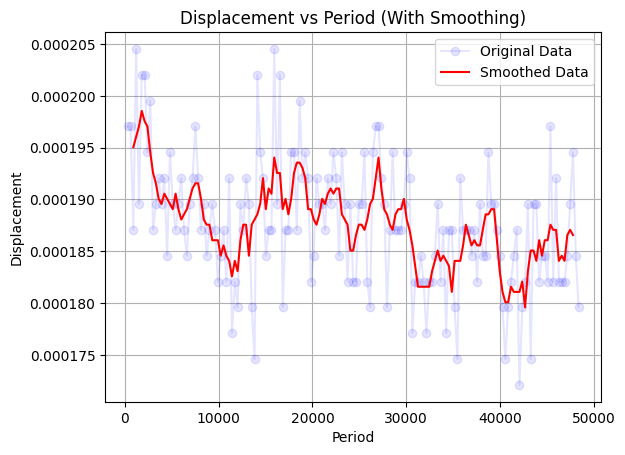

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_displacement_vs_period_with_smoothing(df, window_size):
    # Smooth the displacement using rolling average
    smoothed_displacement = df['displacement'].rolling(window=window_size, center=True).mean()

    # Plot the original and smoothed data
    plt.plot(df['Period'], df['displacement'], marker='o', linestyle='-', color='b', label='Original Data', alpha=0.1)
    plt.plot(df['Period'], smoothed_displacement, color='red', label='Smoothed Data')

    # Labels and title
    plt.xlabel('Period')
    plt.ylabel('Displacement')
    plt.title('Displacement vs Period (With Smoothing)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage with df_with_displacement, smoothing window size 5
plot_displacement_vs_period_with_smoothing(df_with_displacement[:161], window_size=5)


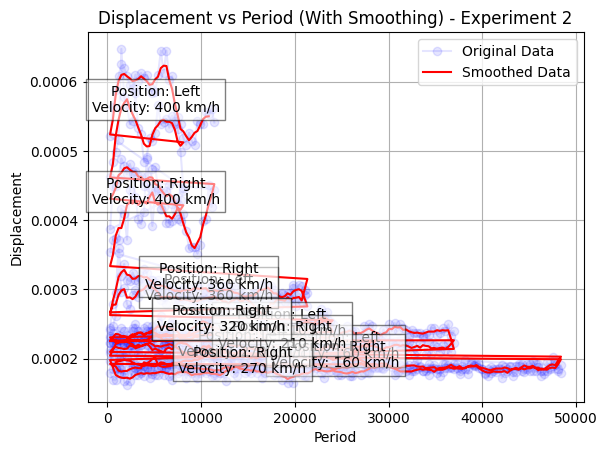

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt

def plot_displacement_vs_period_with_smoothing(df, window_size, experiment_number=2):
    # Filter the dataframe for the chosen experiment number
    df = df[df['experiment_number'] == experiment_number]

    # Smooth the displacement using rolling average
    smoothed_displacement = df['displacement'].rolling(window=window_size, center=True).mean()

    # Plot the original and smoothed data
    plt.plot(df['Period'], df['displacement'], marker='o', linestyle='-', color='b', label='Original Data', alpha=0.1)
    plt.plot(df['Period'], smoothed_displacement, color='red', label='Smoothed Data')

    # Group the data by position and velocity (since experiment is already filtered)
    for position_velocity, group in df.groupby(['position', 'velocity']):
        position, velocity = position_velocity

        # Find the average period and displacement for positioning the text
        avg_period = group['Period'].mean()
        avg_displacement = group['displacement'].mean()

        # Annotate the graph with position and velocity
        plt.text(avg_period, avg_displacement, 
                 f"Position: {position}\nVelocity: {int(velocity)} km/h", 
                 fontsize=10, bbox=dict(facecolor='white', alpha=0.5), ha='center')

    # Labels and title
    plt.xlabel('Period')
    plt.ylabel('Displacement')
    plt.title(f'Displacement vs Period (With Smoothing) - Experiment {experiment_number}')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage with filtering for experiment number 2
plot_displacement_vs_period_with_smoothing(df_with_displacement, window_size=5, experiment_number=2)



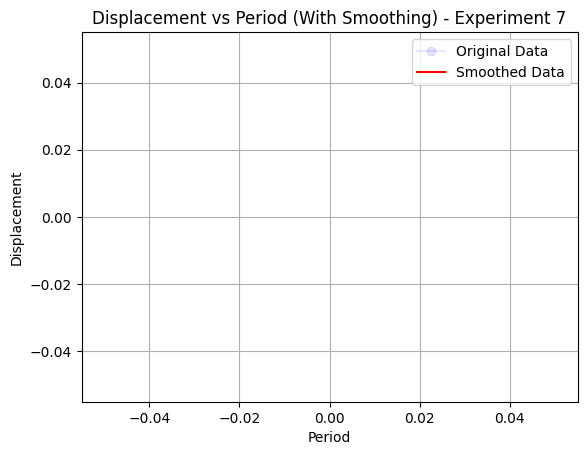

In [28]:
plot_displacement_vs_period_with_smoothing(df_400.iloc[:int(len(df_400)/2)], window_size=5, experiment_number=7)


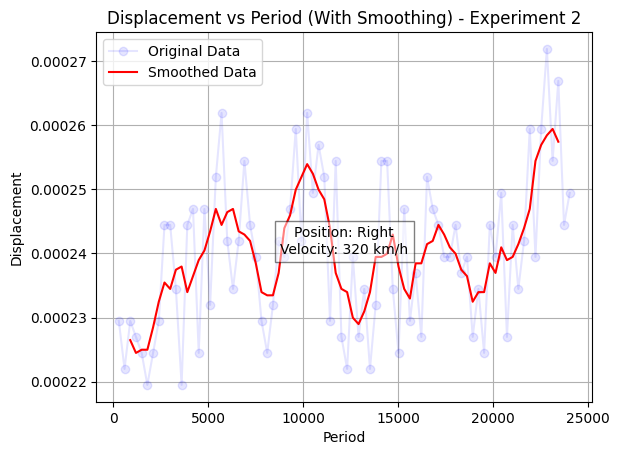

In [16]:
plot_displacement_vs_period_with_smoothing(df_320[:80], window_size=5)

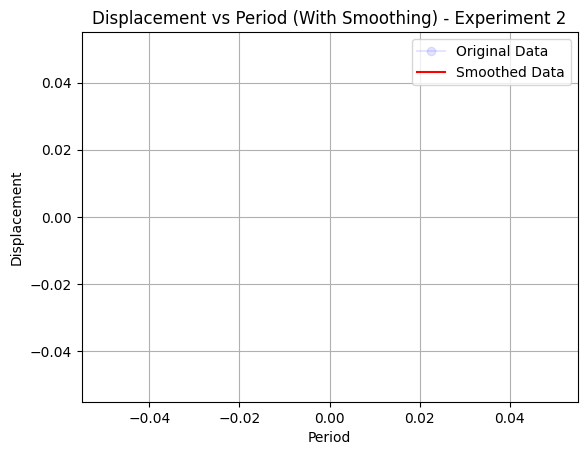

In [26]:
plot_displacement_vs_period_with_smoothing(df_with_displacement[4625:4700], window_size=5)

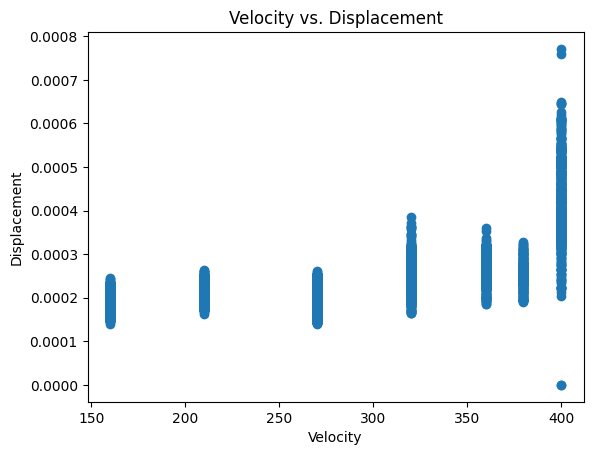

In [134]:
plt.scatter(df_with_displacement['velocity'], df_with_displacement['displacement'])
plt.xlabel('Velocity')
plt.ylabel('Displacement')
plt.title('Velocity vs. Displacement')
plt.show()

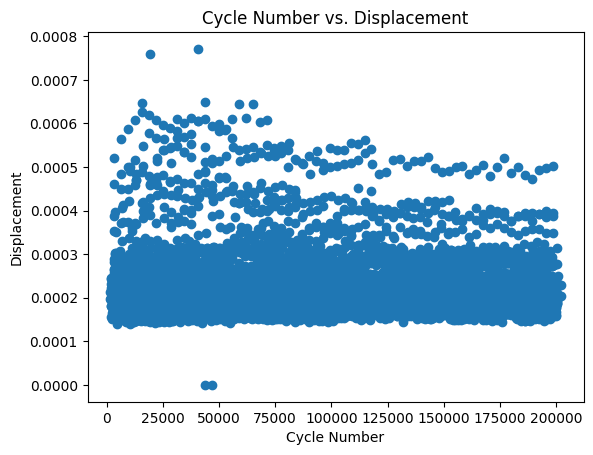

In [135]:
plt.scatter(df_with_displacement['Cycle_Number'], df_with_displacement['displacement'])
plt.xlabel('Cycle Number')
plt.ylabel('Displacement')
plt.title('Cycle Number vs. Displacement')
plt.show()


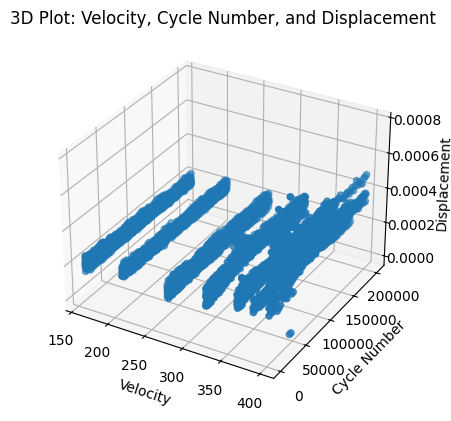

In [136]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_with_displacement['velocity'], df_with_displacement['Cycle_Number'], df_with_displacement['displacement'])

ax.set_xlabel('Velocity')
ax.set_ylabel('Cycle Number')
ax.set_zlabel('Displacement')
plt.title('3D Plot: Velocity, Cycle Number, and Displacement')
plt.show()


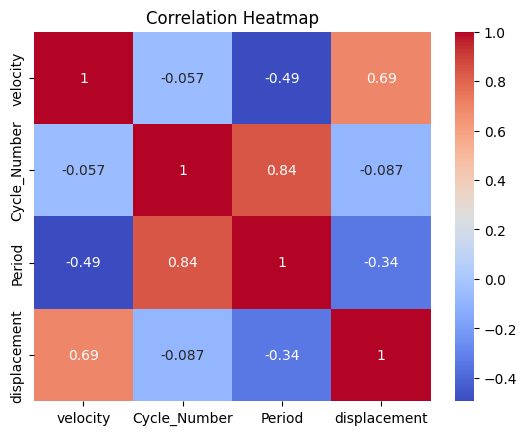

In [137]:
import seaborn as sns

corr_matrix = df_with_displacement[['velocity', 'Cycle_Number', 'Period', 'displacement']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


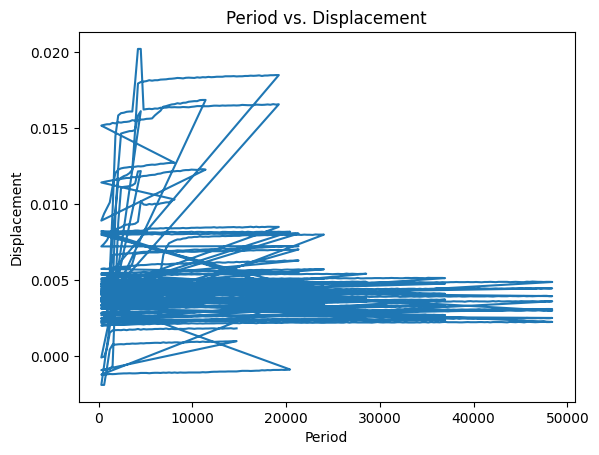

In [77]:
plt.plot(df_with_displacement['Period'], df_with_displacement['displacement'])
plt.xlabel('Period')
plt.ylabel('Displacement')
plt.title('Period vs. Displacement')
plt.show()
